# <font color=blue> Call for Code - "Predict which NC counties will be most at risk from a Hurricane or Tropical Storm" </font>

<img src= "https://dayonerelief.org/wp-content/uploads/2021/03/cropped-cropped-day-one-relief-192x192.png" />
<img src= "https://dayonerelief.org/wp-content/uploads/2020/08/MichaelHenley-1-1920x550.jpg" />



### <font color=red> Step 1: North Carolina Has a Total of 1,079 Zip Codes. </font>

<ul> 
<li> Find and extract all zip codes of north Carolina with lat/long. </li>
<li> For each zip code, find out which county. </li>
<li> For each zip code, find out SVI, NRI, population, flood index at zip code level/county level. </li>
</ul>

<br /><br />
### <font color=red> Issues. </font>

<ul> 
<li> NRI, SVI are defined by Census tract or County </li>
<li> A Census tract can have multiple zip code, and a zip code belong to multiple census tracts</li>
<li> So, not straightforward to find SVI, NRI for a zip code </li>
<li> NWS Alerts has affected counties.  </li>
</ul>



  


In [1]:
#!pip install folium

In [2]:
import pandas as pd
import requests 
import urllib,json
import io



In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_dc0e55810ca143efb6c5f96db6b733bd = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_dc0e55810ca143efb6c5f96db6b733bd = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_dc0e55810ca143efb6c5f96db6b733bd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xxxxxxxxxx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_xxx)

body = client_xxx.get_object(Bucket='learning-donotdelete-pr-lvphfnuhfchjj4',Key='nczips.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dfnczips = pd.read_csv(body)
dfnczips.head()

,COUNTRY,ZIPCODE,PLACE,STATE,STATECODE,COUNTY,LAT,LONG
0,US,27201,Alamance,North Carolina,NC,Alamance,36.0318,-79.4856
1,US,27202,Altamahaw,North Carolina,NC,Alamance,36.1855,-79.5055
2,US,27215,Burlington,North Carolina,NC,Alamance,36.0318,-79.4889
3,US,27216,Burlington,North Carolina,NC,Alamance,36.0475,-79.4797
4,US,27217,Burlington,North Carolina,NC,Alamance,36.1288,-79.4114


In [4]:

body = client_dc0e55810ca143efb6c5f96db6b733bd.get_object(Bucket='learning-donotdelete-pr-lvphfnuhfchjj4',Key='nri_nc_counties.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dfnri = pd.read_csv(body)
dfnri.head()

,STATEABBRV,COUNTY,POPULATION,AREA,RISK_SCORE,RISK_RATNG,RISK_NPCTL,RISK_SPCTL,SOVI_SCORE,SOVI_RATNG,SOVI_NPCTL,SOVI_SPCTL,SOVI_VALUE,RESL_SCORE,RESL_RATNG,RESL_NPCTL,RESL_SPCTL,RESL_VALUE
0,NC,Alamance,151131,423.543352,18.186384,Relatively Moderate,91.438574,87,41.781632,Relatively Moderate,64.513049,57,0.87,55.328998,Relatively Moderate,59.007002,66,2.76645
1,NC,Alexander,37198,260.002306,8.055225,Very Low,31.572247,8,28.379976,Relatively Low,16.168046,9,-2.53,56.152802,Relatively High,68.650541,91,2.80764
2,NC,Alleghany,11155,234.637569,8.279735,Very Low,33.386378,9,45.999212,Relatively High,80.394653,81,1.94,53.323798,Relatively Moderate,33.099936,23,2.66619
3,NC,Anson,26948,531.486716,11.447674,Relatively Low,63.812858,39,37.997635,Relatively Moderate,48.726926,36,-0.09,53.060198,Relatively Moderate,29.949077,19,2.65301
4,NC,Ashe,27281,426.568151,10.999679,Relatively Low,60.120942,36,45.210879,Relatively High,77.530236,73,1.74,54.720002,Relatively Moderate,50.763845,49,2.73600


In [5]:
dfnc_counties = dfnczips[["COUNTY"]]
dfnc_counties=dfnc_counties.drop_duplicates()
for index, row in dfnc_counties.iterrows():
    county = row['COUNTY']
    dfcounty= dfnczips[(dfnczips.COUNTY == county)]
    if not dfcounty.empty:
        dfnc_counties.loc[index,'LAT']=dfcounty['LAT'].iloc[0]
        dfnc_counties.loc[index,'LONG']=dfcounty['LONG'].iloc[0] 
dfnc_counties.head()

,COUNTY,LAT,LONG
0,Alamance,36.0318,-79.4856
12,Alexander,35.9504,-81.0487
15,Alleghany,36.5253,-80.9771
20,Anson,35.1046,-80.1092
27,Ashe,36.4500,-81.6506


In [6]:
risklevels = ['VERY LOW','RELATIVELY LOW','RELATIVELY MODERATE','RELATIVELY HIGH','VERY HIGH']
dfnri = dfnri.apply(lambda x: x.astype(str).str.upper())
for index, row in dfnc_counties.iterrows():
    county = row['COUNTY'].upper()
    dfcounty= dfnri[(dfnri.COUNTY == county)]
    if not dfcounty.empty:
        dfnc_counties.loc[index,'RISK_RATNG']=dfcounty['RISK_RATNG'].iloc[0]
        dfnc_counties.loc[index,'SOVI_RATNG']=dfcounty['SOVI_RATNG'].iloc[0] 
        POPDENSITY=float(dfcounty['POPULATION'].iloc[0])/float(dfcounty['AREA'].iloc[0])
        dfnc_counties.loc[index,'POPDENSITY']=POPDENSITY
        dfnc_counties.loc[index,'RISK_RATNG_LVL']=risklevels.index(dfcounty['RISK_RATNG'].iloc[0]) + 1        
        dfnc_counties.loc[index,'SOVI_RATNG_LVL']=risklevels.index(dfcounty['SOVI_RATNG'].iloc[0]) + 1
        POPDENSITY_LVL=5
        if POPDENSITY<50:
            POPDENSITY_LVL=1
        elif POPDENSITY<100:
            POPDENSITY_LVL=2
        elif POPDENSITY<200:
            POPDENSITY_LVL=3
        elif POPDENSITY<500:
            POPDENSITY_LVL=4
        else:
            POPDENSITY_LVL=5
        
        dfnc_counties.loc[index,'POPDENSITY_LVL']=POPDENSITY_LVL
   

            


In [7]:
dfnc_counties.head()


,COUNTY,LAT,LONG,RISK_RATNG,SOVI_RATNG,POPDENSITY,RISK_RATNG_LVL,SOVI_RATNG_LVL,POPDENSITY_LVL
0,Alamance,36.0318,-79.4856,RELATIVELY MODERATE,RELATIVELY MODERATE,356.825339,3.0,3.0,4.0
12,Alexander,35.9504,-81.0487,VERY LOW,RELATIVELY LOW,143.067962,1.0,2.0,3.0
15,Alleghany,36.5253,-80.9771,VERY LOW,RELATIVELY HIGH,47.541406,1.0,4.0,1.0
20,Anson,35.1046,-80.1092,RELATIVELY LOW,RELATIVELY MODERATE,50.703055,2.0,3.0,2.0
27,Ashe,36.4500,-81.6506,RELATIVELY LOW,RELATIVELY HIGH,63.954611,2.0,4.0,2.0


In [8]:
urlsamecodes="https://www.weather.gov/source/nwr/SameCode.txt"
s=requests.get(urlsamecodes).content
descodes= s.decode('utf-8')
descodes="SAME,COUNTY,STATE\n"+descodes
dfsamecodes =pd.read_csv(io.StringIO(descodes))
dfsamecodes.head()



,SAME,COUNTY,STATE
0,1001,Autauga,AL
1,1003,Baldwin,AL
2,1005,Barbour,AL
3,1007,Bibb,AL
4,1009,Blount,AL


In [9]:
#for index, row in dfnczips.iterrows():
    #lat = row['LAT']
    #lng = row['LONG']
    #url='https://api.weather.gov/points/{},{}'.format(lat, lng ) 
    #results = requests.get(url).json()['properties']
    #APIURL=results['forecast']
    #dfnczips.loc[index,'APIURL']=APIURL

#dfnczips.head()

In [10]:
dfnc = pd.DataFrame(columns = ['description', 'state', 'county','geometry',"latitude","longitude",
                                   "nri_rating","svi_rating",'nrilevel','svilevel','popdensity','popdensitylvl'])

urlnws = "https://api.weather.gov/alerts/active" 
json_url = urllib.request.urlopen(urlnws) 
datanws = json.loads(json_url.read())   
size=len(datanws["features"]) 
for i in range(0,size):
    obj=datanws["features"][i]
    headline=obj["properties"]["headline"]
    description=obj["properties"]["description"]
    ldesc = description.lower();
    samearrlen=len(obj["properties"]["geocode"]["SAME"])
    for j in range(0,samearrlen):
        samecode=obj["properties"]["geocode"]["SAME"][j]
        dfsam = dfsamecodes[(dfsamecodes.SAME == int(samecode))]
        if not dfsam.empty:
            state = dfsam['STATE'].iloc[0].strip()
            county = dfsam['COUNTY'].iloc[0].strip()
            if state!='NC':
                continue
            dfchk = dfnc_counties[(dfnc_counties.COUNTY == county)]
            if not dfchk.empty:
                latitude=dfchk['LAT'].iloc[0]
                longitude=dfchk['LONG'].iloc[0]
                df2 = {'headline': headline, 'description': description,'state': state,  'county': county, 
                       'latitude':latitude,'longitude':longitude,
                       'nri_rating':dfchk['RISK_RATNG'].iloc[0],'svi_rating':dfchk['SOVI_RATNG'].iloc[0],
                       'nrilevel':dfchk['RISK_RATNG_LVL'].iloc[0],'svilevel':dfchk['SOVI_RATNG_LVL'].iloc[0],
                       'popdensity':dfchk['POPDENSITY'].iloc[0],'popdensitylvl':dfchk['POPDENSITY_LVL'].iloc[0]}
                dfnc = dfnc.append(df2, ignore_index=True)

dfnc.head()

,description,state,county,geometry,latitude,longitude,nri_rating,svi_rating,nrilevel,svilevel,popdensity,popdensitylvl,headline
0,The North Carolina Department of Environmental...,NC,Mecklenburg,NaN,35.4733,-80.8726,RELATIVELY MODERATE,RELATIVELY LOW,3.0,2.0,1756.441961,5.0,Air Quality Alert issued July 29 at 3:46PM EDT...
1,The North Carolina Department of Environmental...,NC,Cabarrus,NaN,35.3716,-80.5300,RELATIVELY LOW,RELATIVELY LOW,2.0,2.0,492.610532,4.0,Air Quality Alert issued July 29 at 3:46PM EDT...
2,The North Carolina Department of Environmental...,NC,Union,NaN,35.0831,-80.6597,VERY LOW,VERY LOW,1.0,1.0,318.653213,4.0,Air Quality Alert issued July 29 at 3:46PM EDT...
3,* WHAT...Heat index values up to 107 expected....,NC,Johnston,NaN,35.4037,-78.5421,RELATIVELY LOW,RELATIVELY LOW,2.0,2.0,213.422469,4.0,Heat Advisory issued July 29 at 3:39PM EDT unt...
4,* WHAT...Heat index values up to 107 expected....,NC,Harnett,NaN,35.4897,-78.7249,RELATIVELY LOW,RELATIVELY LOW,2.0,2.0,192.724608,3.0,Heat Advisory issued July 29 at 3:39PM EDT unt...


### <font color=red>Step 2: We can calculate risk from a hurricane or tropical storm for each county based on: NRI, SVI, Flood Index, Population Density, Elevation and 15 day Forecast. </font>

<ul>
    <li> <a href= "https://www.fema.gov/flood-maps/products-tools/national-risk-index">  FEMA NRI, Flood Index </a> </li>
    <li> <a href= "https://www.atsdr.cdc.gov/placeandhealth/svi/index.html"> CDC SVI </a> </li>
    <li> <a href= "https://www.usgs.gov/core-science-systems/national-geospatial-program/national-map"> USGS Elevations </a> </li>
<li> Assign SVI, NRI, ect. A ranking 1-5, 1 being good, 5 worst. </li>
<li> Calculate ranking based on factors. </li>
</ul

In [11]:
for index, row in dfnc.iterrows():
        final_risk_level=round((row['nrilevel']+row['svilevel']+row['popdensitylvl'])/3)
        dfnc.loc[index,'final_risk_level']=final_risk_level

dfnc.head()

,description,state,county,geometry,latitude,longitude,nri_rating,svi_rating,nrilevel,svilevel,popdensity,popdensitylvl,headline,final_risk_level
0,The North Carolina Department of Environmental...,NC,Mecklenburg,NaN,35.4733,-80.8726,RELATIVELY MODERATE,RELATIVELY LOW,3.0,2.0,1756.441961,5.0,Air Quality Alert issued July 29 at 3:46PM EDT...,3.0
1,The North Carolina Department of Environmental...,NC,Cabarrus,NaN,35.3716,-80.5300,RELATIVELY LOW,RELATIVELY LOW,2.0,2.0,492.610532,4.0,Air Quality Alert issued July 29 at 3:46PM EDT...,3.0
2,The North Carolina Department of Environmental...,NC,Union,NaN,35.0831,-80.6597,VERY LOW,VERY LOW,1.0,1.0,318.653213,4.0,Air Quality Alert issued July 29 at 3:46PM EDT...,2.0
3,* WHAT...Heat index values up to 107 expected....,NC,Johnston,NaN,35.4037,-78.5421,RELATIVELY LOW,RELATIVELY LOW,2.0,2.0,213.422469,4.0,Heat Advisory issued July 29 at 3:39PM EDT unt...,3.0
4,* WHAT...Heat index values up to 107 expected....,NC,Harnett,NaN,35.4897,-78.7249,RELATIVELY LOW,RELATIVELY LOW,2.0,2.0,192.724608,3.0,Heat Advisory issued July 29 at 3:39PM EDT unt...,2.0


## <font color=red> Step 3: Show the Risk on Map </font>

<ul>
    <li> <a href= "https://www.weather.gov/documentation/services-web-api">NWS Extended Forecast</a> </li>
<li> For each zip code, pull latest forecast from NWS. </li>
<li> Based on forecast and ranking calculated, calculate and show risk. </li>
</ul>

In [12]:
!pip install folium

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 5.2 MB/s  eta 0:00:01


In [13]:
import folium

mncol = folium.Map(location=[36, -79], zoom_start=7)  

cols =['white','green','yellow','orange','red','purple']

dfnc.apply(lambda row:folium.CircleMarker(
    location=[row["latitude"], 
              row["longitude"]],radius=6,color= '#000066',
    fill=True,fill_color= "#0000FF",weight=0.4,
    popup=row["description"],
    tooltip= row["description"],
    fill_opacity=1).add_to(mncol), axis=1)

folium.LayerControl().add_to(mncol)  

mncol



### Machine Learning Model for NLP Classification of Alerts based on Historic Alerts
#### Use LogisticRegression to predict the alerts severity

In [18]:
#!pip install lime
!pip install keras 
!pip install tensorflow

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 42 kB 2.1 MB/s  eta 0:00:01
     |██████████████████

In [49]:

body = client_dc0e55810ca143efb6c5f96db6b733bd.get_object(Bucket='learning-donotdelete-pr-lvphfnuhfchjj4',Key='historicalalertsnws.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body) 

df['ALERT_SEVERITY'] = df['ALERT_SEVERITY'].str.lower()
df.loc[(df.ALERT_SEVERITY == 'warning'),'ALERT_SEVERITY']='red'
df.loc[(df.ALERT_SEVERITY == 'watch'),'ALERT_SEVERITY']='orange'
df.loc[(df.ALERT_SEVERITY == 'advisory'),'ALERT_SEVERITY']='yellow'
df.loc[(df.ALERT_SEVERITY == 'statement'),'ALERT_SEVERITY']='green'
df.loc[(df.ALERT_SEVERITY == 'outlook'),'ALERT_SEVERITY']='green' 
df.ALERT_SEVERITY.unique()
df.head()


,ALERT_DESC,ALERT_SEVERITY,ALERT_COMMENTS,ALERT_GEO_LOCATION
0,the national weather service in phoenix has is...,red,The National Weather Service in Phoenix has is...,Maricopa; Pinal
1,...hurricane warning remains in effect... ...s...,red,...HURRICANE WARNING REMAINS IN EFFECT... ...S...,Calhoun Islands
2,...storm surge warning remains in effect... .....,red,...STORM SURGE WARNING REMAINS IN EFFECT... .....,Matagorda Islands
3,...storm surge warning remains in effect... .....,red,...STORM SURGE WARNING REMAINS IN EFFECT... .....,Coastal Calhoun
4,this product covers southwest louisiana and so...,green,This product covers Southwest Louisiana and So...,Hardin; Jefferson; Northern Jasper; Northern N...


In [50]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.utils import shuffle

from io import StringIO 
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
 
from sklearn.pipeline import make_pipeline

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from itertools import chain
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
p_stemmer = PorterStemmer()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn import linear_model


import warnings
warnings.filterwarnings('ignore')  

[nltk_data] Downloading package stopwords to /home/wsuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/wsuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
def remove_puncs(punctuations, token):
    for punc in punctuations:
        token = token.replace(punc, '')
    return token
    
def preprocess_text(sentence):
    #print(sentence)
    punctuations = ['!', '?', '-', ':', ';', '/', '(', ')', '[', ']', '#', '$', '*', '@', '+', '>', '<', '=', ',', '.']
    sentence = sentence.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')
    tokens = [word.lower() for word in sentence.split() if word not in punctuations];
    tokens = [remove_puncs(punctuations, token) for token in tokens]
    tokens =  [i for i in tokens if not i in stoplist]
    tokens = [p_stemmer.stem(i) for i in tokens]
    sentence = ' '.join(tokens);
    #print(sentence)
    return sentence

In [52]:
# Let's prepare the data
labels = [ 'green','yellow','orange','red']  

cols_to_consider = ['ALERT_DESC']


row_list = []
for idx, row in df.iterrows():
    if pd.isna(row['ALERT_SEVERITY']):
        continue
    text = ""
    for col in cols_to_consider:
        if row[col]:
            text = "{} {}".format(text, row[col])
    text = text.strip()
    text = preprocess_text(text)
    # print(text)
    row_list.append({
        'text': text,
        'tags': row['ALERT_SEVERITY'],
        'class_label': labels.index(row['ALERT_SEVERITY'].lower()) 
    })
    # break
dfnew = pd.DataFrame(row_list) 

In [53]:
df=dfnew.copy()
df.head()

,text,tags,class_label
0,nation weather servic phoenix issu dust storm ...,red,3
1,hurrican warn remain effect storm surg warn re...,red,3
2,storm surg warn remain effect tropic storm war...,red,3
3,storm surg warn remain effect tropic storm war...,red,3
4,product cover southwest louisiana southeast te...,green,0


In [54]:
list_corpus = df["text"].tolist()
list_labels = df["class_label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}', ngram_range=(1, 3), stop_words = 'english', binary=True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [55]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors, y_train)

LogisticRegression(C=100000.0, n_jobs=1)

In [59]:
pred = logreg.predict(test_vectors) 
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


accuracy = 0.951, precision = 0.951, recall = 0.951, f1 = 0.951


accuracy = 0.951, precision = 0.951, recall = 0.951, f1 = 0.951


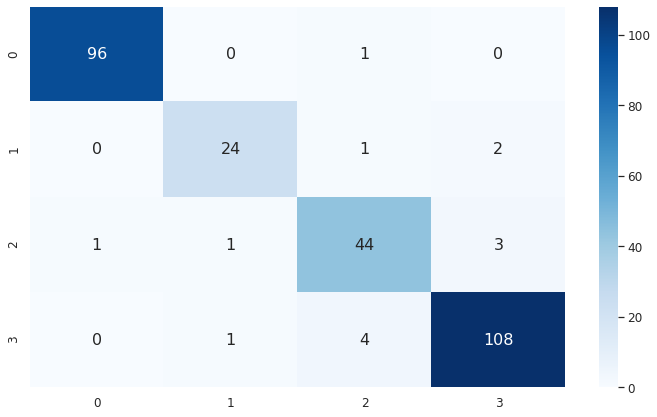

In [69]:
dpred = logreg.predict(test_vectors)  
# model accuracy for X_test   
dtaccuracy = accuracy_score(y_test, pred) 
dtcm = confusion_matrix(y_test, dpred) 
df_cm = pd.DataFrame(dtcm, range(len(labels)), range(len(labels)))
plt.figure(figsize = (12,7))
sns.set(font_scale=1.1)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap='Blues', fmt='g')# font size

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


In [70]:
def dopredict_LR(textsentence):
    text = preprocess_text(textsentence)
    l = [text]
    tstvectors = vectorizer.transform(l)
    pred = logreg.predict(tstvectors)  
    ret = int(pred[0])
    return ret

def getrisklevel(level):
    riskrange = [1,3,4,8]
    for x in range(0,len(riskrange)):
        if r<= riskrange[x]:
            return x
    return 3;


In [74]:
dfncfinal = dfnc.copy()
riskrange = [1,2,4,8]
for index, row in dfncfinal.iterrows(): 
        severity= dopredict_LR(row['description']) 
        dfncfinal['severity'] = severity
        r = round(row['final_risk_level']+int(severity)/2)
        dfncfinal.loc[index,'final_risk_level'] =int(getrisklevel(r))
#dfncfinal = dfncfinal.astype({"final_risk_level": int})        
dfncfinal.final_risk_level.unique()    
dfncfinal.head()

,description,state,county,geometry,latitude,longitude,nri_rating,svi_rating,nrilevel,svilevel,popdensity,popdensitylvl,headline,final_risk_level,severity
0,The North Carolina Department of Environmental...,NC,Mecklenburg,NaN,35.4733,-80.8726,RELATIVELY MODERATE,RELATIVELY LOW,3.0,2.0,1756.441961,5.0,Air Quality Alert issued July 29 at 3:46PM EDT...,1.0,1
1,The North Carolina Department of Environmental...,NC,Cabarrus,NaN,35.3716,-80.5300,RELATIVELY LOW,RELATIVELY LOW,2.0,2.0,492.610532,4.0,Air Quality Alert issued July 29 at 3:46PM EDT...,1.0,1
2,The North Carolina Department of Environmental...,NC,Union,NaN,35.0831,-80.6597,VERY LOW,VERY LOW,1.0,1.0,318.653213,4.0,Air Quality Alert issued July 29 at 3:46PM EDT...,0.0,1
3,* WHAT...Heat index values up to 107 expected....,NC,Johnston,NaN,35.4037,-78.5421,RELATIVELY LOW,RELATIVELY LOW,2.0,2.0,213.422469,4.0,Heat Advisory issued July 29 at 3:39PM EDT unt...,1.0,1
4,* WHAT...Heat index values up to 107 expected....,NC,Harnett,NaN,35.4897,-78.7249,RELATIVELY LOW,RELATIVELY LOW,2.0,2.0,192.724608,3.0,Heat Advisory issued July 29 at 3:39PM EDT unt...,0.0,1


In [75]:
mncol1 = folium.Map(location=[36, -79], zoom_start=7)  

cols =['white','green','yellow','orange','red','purple']

dfnc.apply(lambda row:folium.CircleMarker(
    location=[row["latitude"], 
              row["longitude"]],radius=6,color= '#000066',
    fill=True,fill_color= cols[int(row["final_risk_level"])],weight=0.4,
    popup=row["description"],
    tooltip= row["description"],
    fill_opacity=1).add_to(mncol1), axis=1)

folium.LayerControl().add_to(mncol1)  

mncol1

### <font color=red> Step 4: Elevate the risk and show it on map if the zip code has power outages. </font>
<ul>
<li> Find power outage for the zip code if possible, otherwise for the county. </li>
<li> Elevate the risk level if there is a power outage.</li>
</ul>

In [76]:
import json
jsonfile = client_dc0e55810ca143efb6c5f96db6b733bd.get_object(Bucket='learning-donotdelete-pr-lvphfnuhfchjj4',Key='northcarolinasvi.json')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object 

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, jsonfile )

content = jsonfile.read()

jsonfiledata = json.loads(content) 

In [77]:
dfpower = pd.DataFrame(columns = ['county', 'powercompany', 'outage','lat','lng'])
powerurl="https://oriai-api.mybluemix.net/oriai-api/api/getoutages"
poweruri = urllib.request.urlopen(powerurl) 
powerjson = json.loads(poweruri.read()) 
size=150
for i in range(0,150):
    try:
        obj=powerjson[str(i)]
        county=obj['County']
        powercompany=obj['Power_company']
        outage=obj['Customer_outage']
        lat=obj['latitude']
        lng=obj['longitude']
        df2 = {'county': county, 'powercompany': powercompany,'outage': outage,'lat':lat,'lng':lng}
        dfpower = dfpower.append(df2, ignore_index=True) 
    except:
        None

dfpower.head()


,county,powercompany,outage,lat,lng
0,Alamance,"Duke Energy, Piedmont EMC, Randolph EMC",32,36.0437,-79.3994
1,Buncombe,"Duke Energy, French Broad EMC, Haywood EMC",2,35.6112,-82.5301
2,Cabarrus,"Duke Energy, Energy United, Union Power Cooper...",1,35.3868,-80.5519
3,Caldwell,"Blue Ridge Energy, Duke Energy, Energy United,...",2,35.9530,-81.5464
4,Catawba,"Duke Energy, Energy United, Rutherford EMC",1,35.6620,-81.2151


In [78]:
mncvac = folium.Map(location=[36, -79], zoom_start=7)  

clrvac = folium.Choropleth( 
 geo_data=jsonfiledata, 
 name='choropleth',  
 data=dfpower,  
 columns=['county', 'outage'], 
 key_on='feature.properties.COUNTY',  
 fill_color='Reds', 
 nan_fill_color='white',
 fill_opacity=0.7,  
 line_opacity=0.2,
 nan_fill_opacity=0.0001,
 legend_name='Vaccinated %tage' 
).add_to(mncvac)

dfpower.apply(lambda row:folium.CircleMarker(
    location=[row["lat"], 
              row["lng"]],radius=10,color= 'white',
    fill=False,fill_color= 'red',weight=0.0001,
    popup='Company:'+row["powercompany"]+', Outage:'+str(row["outage"]),
    tooltip= 'Company:'+row["powercompany"]+', Outage:'+str(row["outage"]),
    fill_opacity=0.00001).add_to(mncvac), axis=1)

dfnc.apply(lambda row:folium.CircleMarker(
    location=[row["latitude"], 
              row["longitude"]],radius=6,color= '#000066',
    fill=True,fill_color= cols[int(row["final_risk_level"])],weight=0.4,
    popup=row["description"],
    tooltip= row["description"],
    fill_opacity=1).add_to(mncvac), axis=1)

folium.LayerControl().add_to(mncvac) 

clrvac.geojson.add_child(
    folium.features.GeoJsonTooltip(['COUNTY'],labels=False)
)

 
 
     
mncvac